# Homework 2

## Part 1

Libraries, Declarations, and Data Assignment

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os

if os.name == "nt": # home pc (windows)
    data = pd.read_csv("..\\Data Sets\iris_dataset.csv")
else:
    data = pd.read_csv("../Data Sets/iris_dataset.csv")

In [ ]:
data = data.iloc[:50][["sepal_length", "sepal_width"]]

X = data[['sepal_length']].to_numpy()
y = data['sepal_width'].to_numpy()

In [ ]:
def identity_function(z):
    return z

class MyLinReg(object):
    """
    A class used to represent a single artificial neuron for linear regression. 

    ...

    Attributes
    ----------
    activation_function : function
        The activation function applied to the preactivation term.

    theta : numpy.ndarray
        The weights and bias of the single neuron. The last entry being the bias. 
        This attribute is created when the fit method is called.

    errors : list
        A list containing the mean squared error computed after each iteration 
        of batch gradient descent. 

    Methods
    -------
    fit(self, X, y, alpha = 0.001, epochs = 10)
        Iterates the batch gradient descent algorithm through each sample
        a total of epochs number of times with learning rate alpha. The data 
        consists of the feature vector X and the associated target y. 

    predict(self, X)
        Uses the weights and bias, the feature vector X, and the 
        activation_function to make a prediction on each data instance. 
    """
    def __init__(self, activation_function):
        self.activation_function = activation_function
    
    def __repr__(self):
        return "Model successfully fit."

    def fit(self, X, y, alpha = 0.001, epochs = 100):
        self.theta = np.random.rand(X.shape[1] + 1)
        self.errors = []
        n = X.shape[0]
        
        
        for _ in range(epochs):
            if (len(self.errors) >= 2):                                                 # If there are 2 or more iterations to compare...
                # print(np.sqrt(self.errors[-1]) / np.sqrt(self.errors[-2]))            # (This line can be used to show the minimization-of-loss process)
                if ((np.sqrt(self.errors[-1]) / np.sqrt(self.errors[-2])) > 0.99):      # Take the ratio of the most recent iteration to its predecessor. If that value is 99% or more, the loss was decreased by 1% or less.
                    print(f"The algorithm did not improve beyond 1% after {_+1} iterations.")
                    return self                                                         # In that case, stop the loop and return the current model fit.
            errors = 0
            sum_1 = 0
            sum_2 = 0
            for xi, yi in zip(X, y):
                sum_1 += (self.predict(xi) - yi)*xi
                sum_2 += (self.predict(xi) - yi)
                errors += ((self.predict(xi) - yi)**2)
            self.theta[:-1] -= 2*alpha*sum_1/n
            self.theta[-1] -= 2*alpha*sum_2/n
            self.errors.append(errors/n)
        
        return self

    def predict(self, X):
        weighted_sum = np.dot(X, self.theta[:-1]) + self.theta[-1]
        return self.activation_function(weighted_sum)

(a) Notice that we used 100 epochs which was waste of time and we could have stopped earlier since after about epoch 55 or so, the loss is not getting lower significantly. Modify the above code so that if the change in loss is less than $1\%$, you exit the iterations. 

In [164]:
model = MyLinReg(identity_function)
model.fit(X,y)

The algorithm did not improve beyond 1% after 3 iterations.


Model successfully fit.

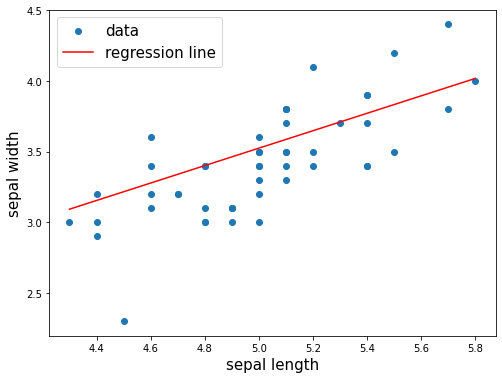

In [165]:
domain_x = np.linspace(np.min(X), np.max(X), 5) # just the domain of X, with a total of 5 points
domain_y = model.predict(domain_x.reshape(-1,1)) # predictions of domain_x.. need to reshape (can't be 1-d; needs double brackets)

plt.figure(figsize = (8, 6))

plt.scatter(X, y, label = "data")
plt.plot(domain_x, domain_y, color="red", label ="regression line")
plt.xlabel("sepal length", fontsize = 15)
plt.ylabel("sepal width", fontsize = 15)
plt.legend(fontsize=15);

(b) The above class uses batch gradient descent to find the minimum of the loss function. Modify the original code and use the stochastic gradient descent instead. Iterate over many iterations and see how the RMSE changes. The graph of RMSE for the batch gradient descent is smooth and decreasing as the number of iterations increases. What can you say about the graph of RMSE when the stochastic gradient descent is used?

Use the following to take a random point with this index:  
`np.random.randint(0, 50)`

In [190]:
def identity_function(z):
    return z

class MyLinReg(object):
    """
    A class used to represent a single artificial neuron for linear regression. 

    ...

    Attributes
    ----------
    activation_function : function
        The activation function applied to the preactivation term.

    theta : numpy.ndarray
        The weights and bias of the single neuron. The last entry being the bias. 
        This attribute is created when the fit method is called.

    errors : list
        A list containing the mean squared error computed after each iteration 
        of batch gradient descent. 

    Methods
    -------
    fit(self, X, y, alpha = 0.001, epochs = 10)
        Iterates the stochastic gradient descent algorithm
        a total of epochs number of times with learning rate alpha. The data 
        consists of the feature vector X and the associated target y. 

    predict(self, X)
        Uses the weights and bias, the feature vector X, and the 
        activation_function to make a prediction on each data instance. 
    """
    def __init__(self, activation_function):
        self.activation_function = activation_function
    
    def __repr__(self):
        return "Model successfully fit."

    def fit(self, X, y, alpha = 0.001, epochs = 100):
        self.theta = np.random.rand(X.shape[1] + 1)
        self.errors = []
        n = X.shape[0]
        
        
        for _ in range(epochs):
            errors = 0

            random_index = np.random.randint(0,50)
            self.theta[:-1] -= 2 * alpha * (self.predict(X[random_index]) - y[random_index]) * X[random_index]
            self.theta[-1] -= 2 * alpha * (self.predict(X[random_index]) - y[random_index])
            self.errors.append((self.predict(X[random_index]) - y[random_index])**2)


            # for xi, yi in zip(X, y):
            #     sum_1 += (self.predict(xi) - yi)*xi
            #     sum_2 += (self.predict(xi) - yi)
            #     errors += ((self.predict(xi) - yi)**2)
            # self.theta[:-1] -= 2*alpha*sum_1/n
            # self.theta[-1] -= 2*alpha*sum_2/n
            # self.errors.append(errors/n)
        
        return self

    def predict(self, X):
        weighted_sum = np.dot(X, self.theta[:-1]) + self.theta[-1]
        return self.activation_function(weighted_sum)

In [189]:
model2 = MyLinReg(identity_function)
model2.fit(X,y)

Model successfully fit.

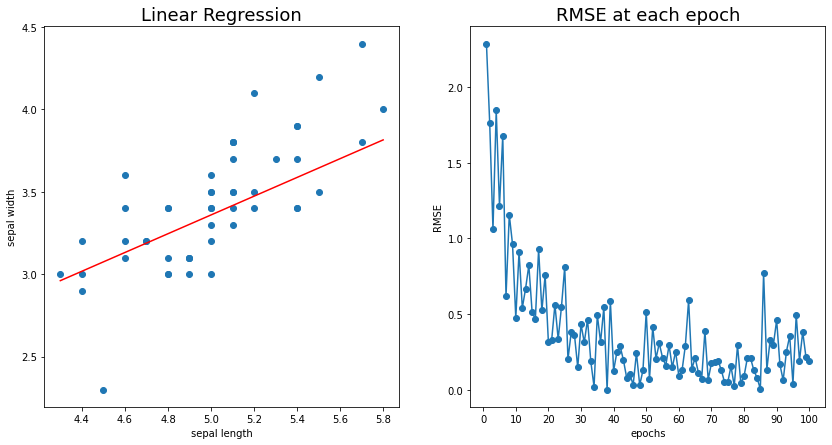

In [204]:
model = MyLinReg(identity_function)
model.fit(X, y, alpha = 0.001, epochs = 100)

domain_x = np.linspace(np.min(X), np.max(X), 2)
domain_y = model.predict(domain_x.reshape(-1, 1))

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14,7))

ax1.scatter(X, y)
ax1.plot(domain_x, domain_y, color = "red")
ax1.set_xlabel("sepal length")
ax1.set_ylabel("sepal width")
ax1.set_title("Linear Regression", fontsize = 18)

ax2.plot(range(1, len(model.errors) + 1), 
         np.sqrt(model.errors),
         marker = "o")
ax2.set_xlabel("epochs")
ax2.set_ylabel("RMSE")
ax2.set_xticks(range(0, len(model.errors) + 1, 10))
ax2.set_title("RMSE at each epoch", fontsize = 18);

The graph for stochastic gradient descent is erratic, but trends downwards to an error of zero.

## Part 2

In [217]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import SGDRegressor
from sklearn.metrics import mean_squared_error

import seaborn as sns

if os.name == "nt": # home pc (windows)
    ads_data = pd.read_csv("..\\Data Sets\\advertising_dataset.csv")
else:
    ads_data = pd.read_csv("../Data Sets/advertising_dataset.csv")

# https://www.kaggle.com/datasets/ashydv/advertising-dataset
# https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html
# https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.SGDRegressor.html

First, let's just see what happens *without* scaling the data.

In [245]:
ads_data = ads_data[["TV", "radio", "newspaper", "sales"]]

X = ads_data[['TV', 'radio']] # has to be multi-diminsional
y = ads_data['sales']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
reg = SGDRegressor()

reg.fit(X_train, y_train)
w = reg.coef_
b = reg.intercept_

print(f"The linear regression model based on the training data is \n\
predicted_sales = {np.round(w[0],3)} * TV + {np.round(w[1],3)} * radio + {np.round(b,3)}")
mse_train = mean_squared_error(y_train, reg.predict(X_train))
mse_test = mean_squared_error(y_test, reg.predict(X_test))

print(f"\nRMSE on the training data: {np.sqrt(mse_train)} \n\
RMSE on the test data: {np.sqrt(mse_test)}")

The linear regression model based on the training data is 
predicted_sales = -114647600559.263 * TV + 104916856115.426 * radio + [-3.80525248e+09]

RMSE on the training data: 18205630662327.203 
RMSE on the test data: 15609630100077.96


As we can see, this is prettyt wild. Let's scale the data to see if we can improve.

In [247]:
X = ads_data[['TV', 'radio']] # has to be multi-diminsional
y = ads_data['sales']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
# Here, we scale the training and test sets seperately:
X_train = MinMaxScaler().fit_transform(X_train)
X_test = MinMaxScaler().fit_transform(X_test)

reg = SGDRegressor()
reg.fit(X_train, y_train)
w = reg.coef_
b = reg.intercept_

print(f"The linear regression model based on the training data is \n\
predicted_sales = {np.round(w[0],3)} * TV + {np.round(w[1],3)} * radio + {np.round(b,3)}")
mse_train = mean_squared_error(y_train, reg.predict(X_train))
mse_test = mean_squared_error(y_test, reg.predict(X_test))

print(f"\nRMSE on the training data: {np.sqrt(mse_train)} \n\
RMSE on the test data: {np.sqrt(mse_test)}")

The linear regression model based on the training data is 
predicted_sales = 11.904 * TV + 9.314 * radio + [3.869]

RMSE on the training data: 1.6303841995400012 
RMSE on the test data: 1.9320504861585517


Clearly, these results are much better.

## Part 3

Libraries, Declarations, and Data Assignment

In [263]:
if os.name == "nt":
    data = pd.read_csv("..\\Data Sets\mtcars.csv")
else:
    data = pd.read_csv("../Data Sets/mtcars.csv")

data.head()


,Unnamed: 0,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
0,Mazda RX4,21.0,6,160.0,110,3.90,2.620,16.46,0,1,4,4
1,Mazda RX4 Wag,21.0,6,160.0,110,3.90,2.875,17.02,0,1,4,4
2,Datsun 710,22.8,4,108.0,93,3.85,2.320,18.61,1,1,4,1
3,Hornet 4 Drive,21.4,6,258.0,110,3.08,3.215,19.44,1,0,3,1
4,Hornet Sportabout,18.7,8,360.0,175,3.15,3.440,17.02,0,0,3,2


<AxesSubplot:>

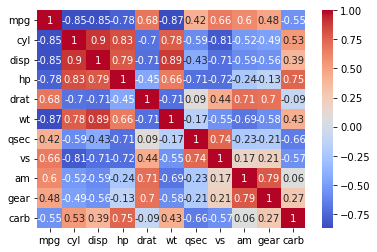

In [266]:
corr_matrix = np.round(data.corr(), 2)
sns.heatmap(data=corr_matrix, annot=True, cmap="coolwarm")

Three continuous variables that are correlated the highest are displacement, weight, and horsepower (which, while an integer, is not categorical).

In [286]:
X = data[['disp','hp','wt']]
y = data['mpg']

(22, 22)

In [291]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
# Here, we scale the training and test sets seperately:
X_train = MinMaxScaler().fit_transform(X_train)
X_test = MinMaxScaler().fit_transform(X_test)

reg = SGDRegressor()
reg.fit(X_train, y_train)

w = reg.coef_
b = reg.intercept_

print(f"The linear regression model based on the training data is \n\
predicted_sales = {np.round(w[0],3)} * displacement + {np.round(w[1],3)} * horsepower + {np.round(w[2],3)} * weight + {np.round(b,3)}")
mse_train = mean_squared_error(y_train, reg.predict(X_train))
mse_test = mean_squared_error(y_test, reg.predict(X_test))

print(f"\nRMSE on the training data: {np.sqrt(mse_train)} \n\
RMSE on the test data: {np.sqrt(mse_test)}")

The linear regression model based on the training data is 
predicted_sales = -7.508 * displacement + -4.979 * horsepower + -5.302 * weight + [27.343]

RMSE on the training data: 2.7430104019553725 
RMSE on the test data: 2.6676849255691653
